# Hi, it's me <3 Jose Luis! 

In this part I'm going to use a Financial API, Python and some packages like requests (for json data), seaborn/matplotlib and pandas.

We have some limitations like 5 years max for request but we can work with dat. As we see in my [first part](https://joseluistello.github.io/r/2021/06/28/semiconductors-part1.html) this second part is divided into X points:

* I'm going to talk about one companie in particular 
* Select some financial ratios
* Download and plot the data
* Explain patterns 
* Regression analysis and forecasting modeling

Let's begin importing our modules 

In [6]:
import requests 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json
from pandas import json_normalize 
from pandas.io.json import json_normalize

### Let's create parameters 

In [7]:
company = "NVDA"
years = 5

In [8]:
api_key = '27ae1dd809036202bcf78ee64609eb76'

In [ ]:
frames = [df1, df2, df3]
result = pd.concat(frames)

### Request API Json data!

In [10]:
r = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey={api_key}')

data = r.json()

data

[{'date': '2021-01-31',
  'symbol': 'NVDA',
  'reportedCurrency': 'USD',
  'fillingDate': '2021-02-26',
  'acceptedDate': '2021-02-26 17:03:14',
  'period': 'FY',
  'revenue': 16675000000,
  'costOfRevenue': 6279000000,
  'grossProfit': 10396000000,
  'grossProfitRatio': 0.623448275862069,
  'researchAndDevelopmentExpenses': 3924000000,
  'generalAndAdministrativeExpenses': 0.0,
  'sellingAndMarketingExpenses': 0.0,
  'sellingGeneralAndAdministrativeExpenses': 1940000000,
  'otherExpenses': 4000000.0,
  'operatingExpenses': 5864000000,
  'costAndExpenses': 12143000000,
  'interestExpense': 184000000,
  'depreciationAndAmortization': 1098000000,
  'ebitda': 5630000000,
  'ebitdaratio': 0.3376311844077961,
  'operatingIncome': 4532000000,
  'operatingIncomeRatio': 0.271784107946027,
  'totalOtherIncomeExpensesNet': 4000000.0,
  'incomeBeforeTax': 4409000000,
  'incomeBeforeTaxRatio': 0.26440779610194903,
  'incomeTaxExpense': 77000000,
  'netIncome': 4332000000,
  'netIncomeRatio': 0.259

### Time to extract data from [API](https://financialmodelingprep.com/developer/docs) 

In [7]:
date = []
symbol = []
revenue = []
costOfRevenue = []
grossProfit = []
researchAndDevelopmentExpenses = []
generalAndAdministrativeExpenses = []
sellingAndMarketingExpenses = []
sellingGeneralAndAdministrativeExpenses = []
otherExpenses = []
operatingExpenses = []
costAndExpenses = []
interestExpense = []
depreciationAndAmortization = []
ebitda = []
ebitdaratio = []
operatingIncome = []
operatingIncomeRatio = []
totalOtherIncomeExpensesNet = []
incomeBeforeTax = []
incomeBeforeTaxRatio = []
incomeTaxExpense = []
netIncome = []

     
for finance in data:
    date.append(finance["date"])
    symbol.append(finance["symbol"])
    revenue.append(finance["revenue"])
    costOfRevenue.append(finance["costOfRevenue"])
    grossProfit.append(finance["grossProfit"])
    researchAndDevelopmentExpenses.append(finance["researchAndDevelopmentExpenses"])
    generalAndAdministrativeExpenses.append(finance["generalAndAdministrativeExpenses"])
    sellingAndMarketingExpenses.append(finance["sellingAndMarketingExpenses"])
    sellingGeneralAndAdministrativeExpenses.append(finance["sellingGeneralAndAdministrativeExpenses"])
    otherExpenses.append(finance["otherExpenses"])
    operatingExpenses.append(finance["operatingExpenses"])
    costAndExpenses.append(finance["costAndExpenses"])
    interestExpense.append(finance["interestExpense"])
    depreciationAndAmortization.append(finance["depreciationAndAmortization"])
    ebitda.append(finance["ebitda"])
    ebitdaratio.append(finance["ebitdaratio"])
    operatingIncome.append(finance["operatingIncome"])
    operatingIncomeRatio.append(finance["operatingIncomeRatio"])
    totalOtherIncomeExpensesNet.append(finance["totalOtherIncomeExpensesNet"])
    incomeBeforeTax.append(finance["incomeBeforeTax"])
    incomeBeforeTaxRatio.append(finance["incomeBeforeTaxRatio"])
    incomeTaxExpense.append(finance["incomeTaxExpense"])
    netIncome.append(finance["netIncome"])
      
income_nvda_dict = {
    "Date" : date,
    "Ticket": symbol,
    "Revenue" : revenue,
    "CostOfRevenue" : costOfRevenue,
    "grossProfit" : grossProfit,
    "researchAndDevelopmentExpenses" : researchAndDevelopmentExpenses,
    "generalAndAdministrativeExpenses" : generalAndAdministrativeExpenses, 
    "sellingAndMarketingExpenses" : sellingAndMarketingExpenses,
    "sellingGeneralAndAdministrativeExpenses" : sellingGeneralAndAdministrativeExpenses,
    "otherExpenses" : otherExpenses,
    "operatingExpenses" : operatingExpenses, 
    "costAndExpenses" : costAndExpenses, 
    "interestExpense" : interestExpense, 
    "depreciationAndAmortization" : depreciationAndAmortization, 
    "ebitda" : ebitda,
    "ebitdaratio" : ebitdaratio, 
    "operatingIncome" : operatingIncome, 
    "operatingIncomeRatio" : operatingIncomeRatio,
    "totalOtherIncomeExpensesNet" : totalOtherIncomeExpensesNet,
    "incomeBeforeTax" : incomeBeforeTax,
    "incomeBeforeTaxRatio" : incomeBeforeTaxRatio,
    "incomeTaxExpense" : incomeTaxExpense,
    "NetIncome" : netIncome
                }

## Python Object!

In [8]:
income_nvda_dict

{'Date': ['2021-01-31',
  '2020-01-26',
  '2019-01-27',
  '2018-01-28',
  '2017-01-29'],
 'Ticket': ['NVDA', 'NVDA', 'NVDA', 'NVDA', 'NVDA'],
 'Revenue': [16675000000, 10918000000, 11716000000, 9714000000, 6910000000],
 'CostOfRevenue': [6279000000, 4150000000, 4545000000, 3892000000, 2847000000],
 'grossProfit': [10396000000, 6768000000, 7171000000, 5822000000, 4063000000],
 'researchAndDevelopmentExpenses': [3924000000,
  2829000000,
  2376000000,
  1797000000,
  1463000000],
 'generalAndAdministrativeExpenses': [0.0,
  1093000000,
  991000000,
  815000000,
  663000000],
 'sellingAndMarketingExpenses': [0.0, 0.0, 0.0, 0.0, 0.0],
 'sellingGeneralAndAdministrativeExpenses': [1940000000,
  1093000000,
  991000000,
  815000000,
  666000000],
 'otherExpenses': [4000000.0, 124000000, 92000000, -14000000, 3000000.0],
 'operatingExpenses': [5864000000,
  3922000000,
  3367000000,
  2612000000,
  2129000000],
 'costAndExpenses': [12143000000,
  8072000000,
  7912000000,
  6504000000,
  497600

## From Object to Pandas Frame

In [9]:
income_nvda_df = pd.DataFrame(income_nvda_dict, columns = ['Date', 'Ticket', 'Revenue', 'CostOfRevenue', 'grossProfit',
'researchAndDevelopmentExpenses',
'generalAndAdministrativeExpenses',
'sellingAndMarketingExpenses',
'sellingGeneralAndAdministrativeExpenses',
'otherExpenses',
'operatingExpenses',
'costAndExpenses',
'interestExpense',
'depreciationAndAmortization',
'ebitda',
'ebitdaratio',
'operatingIncome',
'operatingIncomeRatio',
'totalOtherIncomeExpensesNet',
'incomeTaxExpense ',
'NetIncome'])

In [10]:
income_nvda_df

,Date,Ticket,Revenue,CostOfRevenue,grossProfit,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,...,costAndExpenses,interestExpense,depreciationAndAmortization,ebitda,ebitdaratio,operatingIncome,operatingIncomeRatio,totalOtherIncomeExpensesNet,incomeTaxExpense,NetIncome
0,2021-01-31,NVDA,16675000000,6279000000,10396000000,3924000000,0.000000e+00,0.0,1940000000,4000000.0,...,12143000000,184000000,1098000000,5630000000,0.337631,4532000000,0.271784,4000000.0,NaN,4332000000
1,2020-01-26,NVDA,10918000000,4150000000,6768000000,2829000000,1.093000e+09,0.0,1093000000,124000000.0,...,8072000000,52000000,381000000,3227000000,0.295567,2846000000,0.260670,-2000000.0,NaN,2796000000
2,2019-01-27,NVDA,11716000000,4545000000,7171000000,2376000000,9.910000e+08,0.0,991000000,92000000.0,...,7912000000,58000000,262000000,4066000000,0.347047,3804000000,0.324684,14000000.0,NaN,4141000000
3,2018-01-28,NVDA,9714000000,3892000000,5822000000,1797000000,8.150000e+08,0.0,815000000,-14000000.0,...,6504000000,61000000,199000000,3409000000,0.350937,3210000000,0.330451,-22000000.0,NaN,3047000000
4,2017-01-29,NVDA,6910000000,2847000000,4063000000,1463000000,6.630000e+08,0.0,666000000,3000000.0,...,4976000000,58000000,187000000,2121000000,0.306946,1934000000,0.279884,0.0,NaN,1666000000


### This code sort our Pandas Frame!

In [11]:
income_nvda_df = income_nvda_df.sort_values(by=['Date'])

In [12]:
income_nvda_df

,Date,Ticket,Revenue,CostOfRevenue,grossProfit,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,...,costAndExpenses,interestExpense,depreciationAndAmortization,ebitda,ebitdaratio,operatingIncome,operatingIncomeRatio,totalOtherIncomeExpensesNet,incomeTaxExpense,NetIncome
4,2017-01-29,NVDA,6910000000,2847000000,4063000000,1463000000,6.630000e+08,0.0,666000000,3000000.0,...,4976000000,58000000,187000000,2121000000,0.306946,1934000000,0.279884,0.0,NaN,1666000000
3,2018-01-28,NVDA,9714000000,3892000000,5822000000,1797000000,8.150000e+08,0.0,815000000,-14000000.0,...,6504000000,61000000,199000000,3409000000,0.350937,3210000000,0.330451,-22000000.0,NaN,3047000000
2,2019-01-27,NVDA,11716000000,4545000000,7171000000,2376000000,9.910000e+08,0.0,991000000,92000000.0,...,7912000000,58000000,262000000,4066000000,0.347047,3804000000,0.324684,14000000.0,NaN,4141000000
1,2020-01-26,NVDA,10918000000,4150000000,6768000000,2829000000,1.093000e+09,0.0,1093000000,124000000.0,...,8072000000,52000000,381000000,3227000000,0.295567,2846000000,0.260670,-2000000.0,NaN,2796000000
0,2021-01-31,NVDA,16675000000,6279000000,10396000000,3924000000,0.000000e+00,0.0,1940000000,4000000.0,...,12143000000,184000000,1098000000,5630000000,0.337631,4532000000,0.271784,4000000.0,NaN,4332000000


### Divide our column for a better visualization! 

In [13]:
income_nvda_df["Revenue"] = income_nvda_df['Revenue'].div(1000000000)

In [14]:
income_nvda_df

,Date,Ticket,Revenue,CostOfRevenue,grossProfit,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,otherExpenses,...,costAndExpenses,interestExpense,depreciationAndAmortization,ebitda,ebitdaratio,operatingIncome,operatingIncomeRatio,totalOtherIncomeExpensesNet,incomeTaxExpense,NetIncome
4,2017-01-29,NVDA,6.910,2847000000,4063000000,1463000000,6.630000e+08,0.0,666000000,3000000.0,...,4976000000,58000000,187000000,2121000000,0.306946,1934000000,0.279884,0.0,NaN,1666000000
3,2018-01-28,NVDA,9.714,3892000000,5822000000,1797000000,8.150000e+08,0.0,815000000,-14000000.0,...,6504000000,61000000,199000000,3409000000,0.350937,3210000000,0.330451,-22000000.0,NaN,3047000000
2,2019-01-27,NVDA,11.716,4545000000,7171000000,2376000000,9.910000e+08,0.0,991000000,92000000.0,...,7912000000,58000000,262000000,4066000000,0.347047,3804000000,0.324684,14000000.0,NaN,4141000000
1,2020-01-26,NVDA,10.918,4150000000,6768000000,2829000000,1.093000e+09,0.0,1093000000,124000000.0,...,8072000000,52000000,381000000,3227000000,0.295567,2846000000,0.260670,-2000000.0,NaN,2796000000
0,2021-01-31,NVDA,16.675,6279000000,10396000000,3924000000,0.000000e+00,0.0,1940000000,4000000.0,...,12143000000,184000000,1098000000,5630000000,0.337631,4532000000,0.271784,4000000.0,NaN,4332000000


### Time to visualize! 

#### Matplotlib vs Seaborn

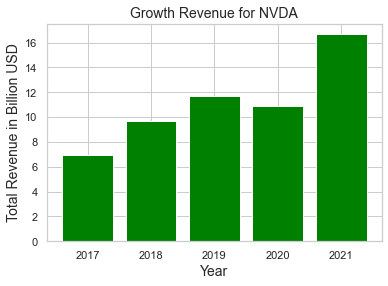

In [18]:
plt.bar(income_nvda_df['Date'], income_nvda_df['Revenue'], color='green')
plt.title('Growth Revenue for NVDA', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Revenue in Billion USD', fontsize=14)
plt.xticks(income_nvda_df['Date'],['2017', '2018', '2019', '2020', '2021'])
plt.show()

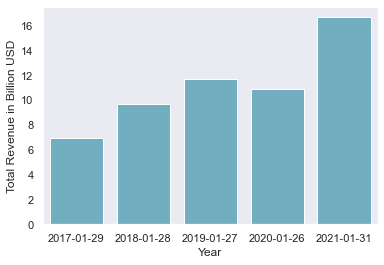

In [45]:
sns.set_style('dark')
ax = sns.barplot(
            x='Date', 
            y='Revenue',
            data=income_nvda_df,
            color = 'c'
                );
ax.set(xlabel='Year', ylabel='Total Revenue in Billion USD')
plt.show()

In [37]:
income_nvda_df["costAndExpenses"] = income_nvda_df['costAndExpenses'].div(1000000000)

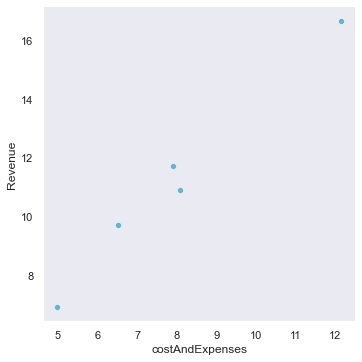

In [59]:
sns.relplot(x="costAndExpenses", 
            y="Revenue", 
            data=income_nvda_df,
            color = 'c'
           );